## Group Proposal

**Predicting whether an NBA player will make it to the All-Star team based on their performance statistics in the 2023 season using the 2021-2022 seasons.**


For our group proposal, we want to predict which NBA players will make it to the All-Star selections based on their performance. The NBA (National Basketball Association) is a professional basketball league in North America that features 30 teams. Each team consists of players who compete against each other in regular season games, with the goal of making it to the playoffs and eventually winning the NBA championship.

The NBA All-Star Game is an annual exhibition game that features the best players from each conference. The players are selected based on a combination of fan, player, and media voting. Being selected to the All-Star team is a significant accomplishment for NBA players and is often seen as a sign of their individual success and impact on the league.

The NBA tracks various performance statistics for each player, including points per game, rebounds per game, assists per game, field goal percentage, and many others. These statistics are used to evaluate a player's performance and value to their team.

In recent years, there has been an increasing interest in using machine learning and data analysis techniques to predict various outcomes in sports, including player performance, team success, and player awards such as All-Star selections. The NBA 2021-2022 per-game statistics dataset provides a rich source of data that can be used to build predictive models for various outcomes, including predicting whether a player will make it to the All-Star team in the 2023 season. 


In [6]:
### Loading of base packages manually 

library(datasets)   # loading of library datasets
library(tidyverse)  # loading of tidyverse library
library(tidymodels)
library(tibble)
library(httr)
options(repr.matrix.max.rows = 6)
# source('tests.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [7]:
# URL of the team statistics page for the 2021-2022 NBA season
# url <- "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"

# Load the HTML content from the URL
# page <- read_html(url)

page <- read_csv("https://raw.githubusercontent.com/DrakenRaptor/Section006-28-Proposal/main/NBA%202022-2023(1).csv")
page
# table <- html_table(html_nodes(page, "table")[1])
# table

Rows: 644 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Player, Pos, Tm, Player-additional\
dbl (27): Rk, Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional\
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Precious Achiuwa,C,23,TOR,42,11,947,156,325,⋯,81,184,265,42,26,26,49,85,408,achiupr01\
2,Steven Adams,C,29,MEM,42,42,1133,157,263,⋯,214,271,485,97,36,46,79,98,361,adamsst01\
3,Bam Adebayo,C,25,MIA,61,61,2137,509,943,⋯,154,434,588,200,75,50,153,172,1295,adebaba01\
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
514,Trae Young,PG,24,ATL,58,58,2037,486,1137,⋯,44,129,173,585,65,9,237,86,1545,youngtr01\
515,Cody Zeller,C,30,MIA,7,0,96,14,22,⋯,11,8,19,5,1,3,5,17,42,zelleco01\
516,Ivica Zubac,C,25,LAC,61,61,1780,245,396,⋯,203,413,616,65,24,81,104,179,620,zubaciv01}


In [9]:
selected_cols <- page |>
                 select(Player, GS, "eFG%", PTS) 
selected_cols

Player,GS,eFG%,PTS
<chr>,<dbl>,<dbl>,<dbl>
Precious Achiuwa,11,0.512,408
Steven Adams,42,0.597,361
Bam Adebayo,61,0.540,1295
⋮,⋮,⋮,⋮
Trae Young,58,0.482,1545
Cody Zeller,0,0.636,42
Ivica Zubac,61,0.619,620


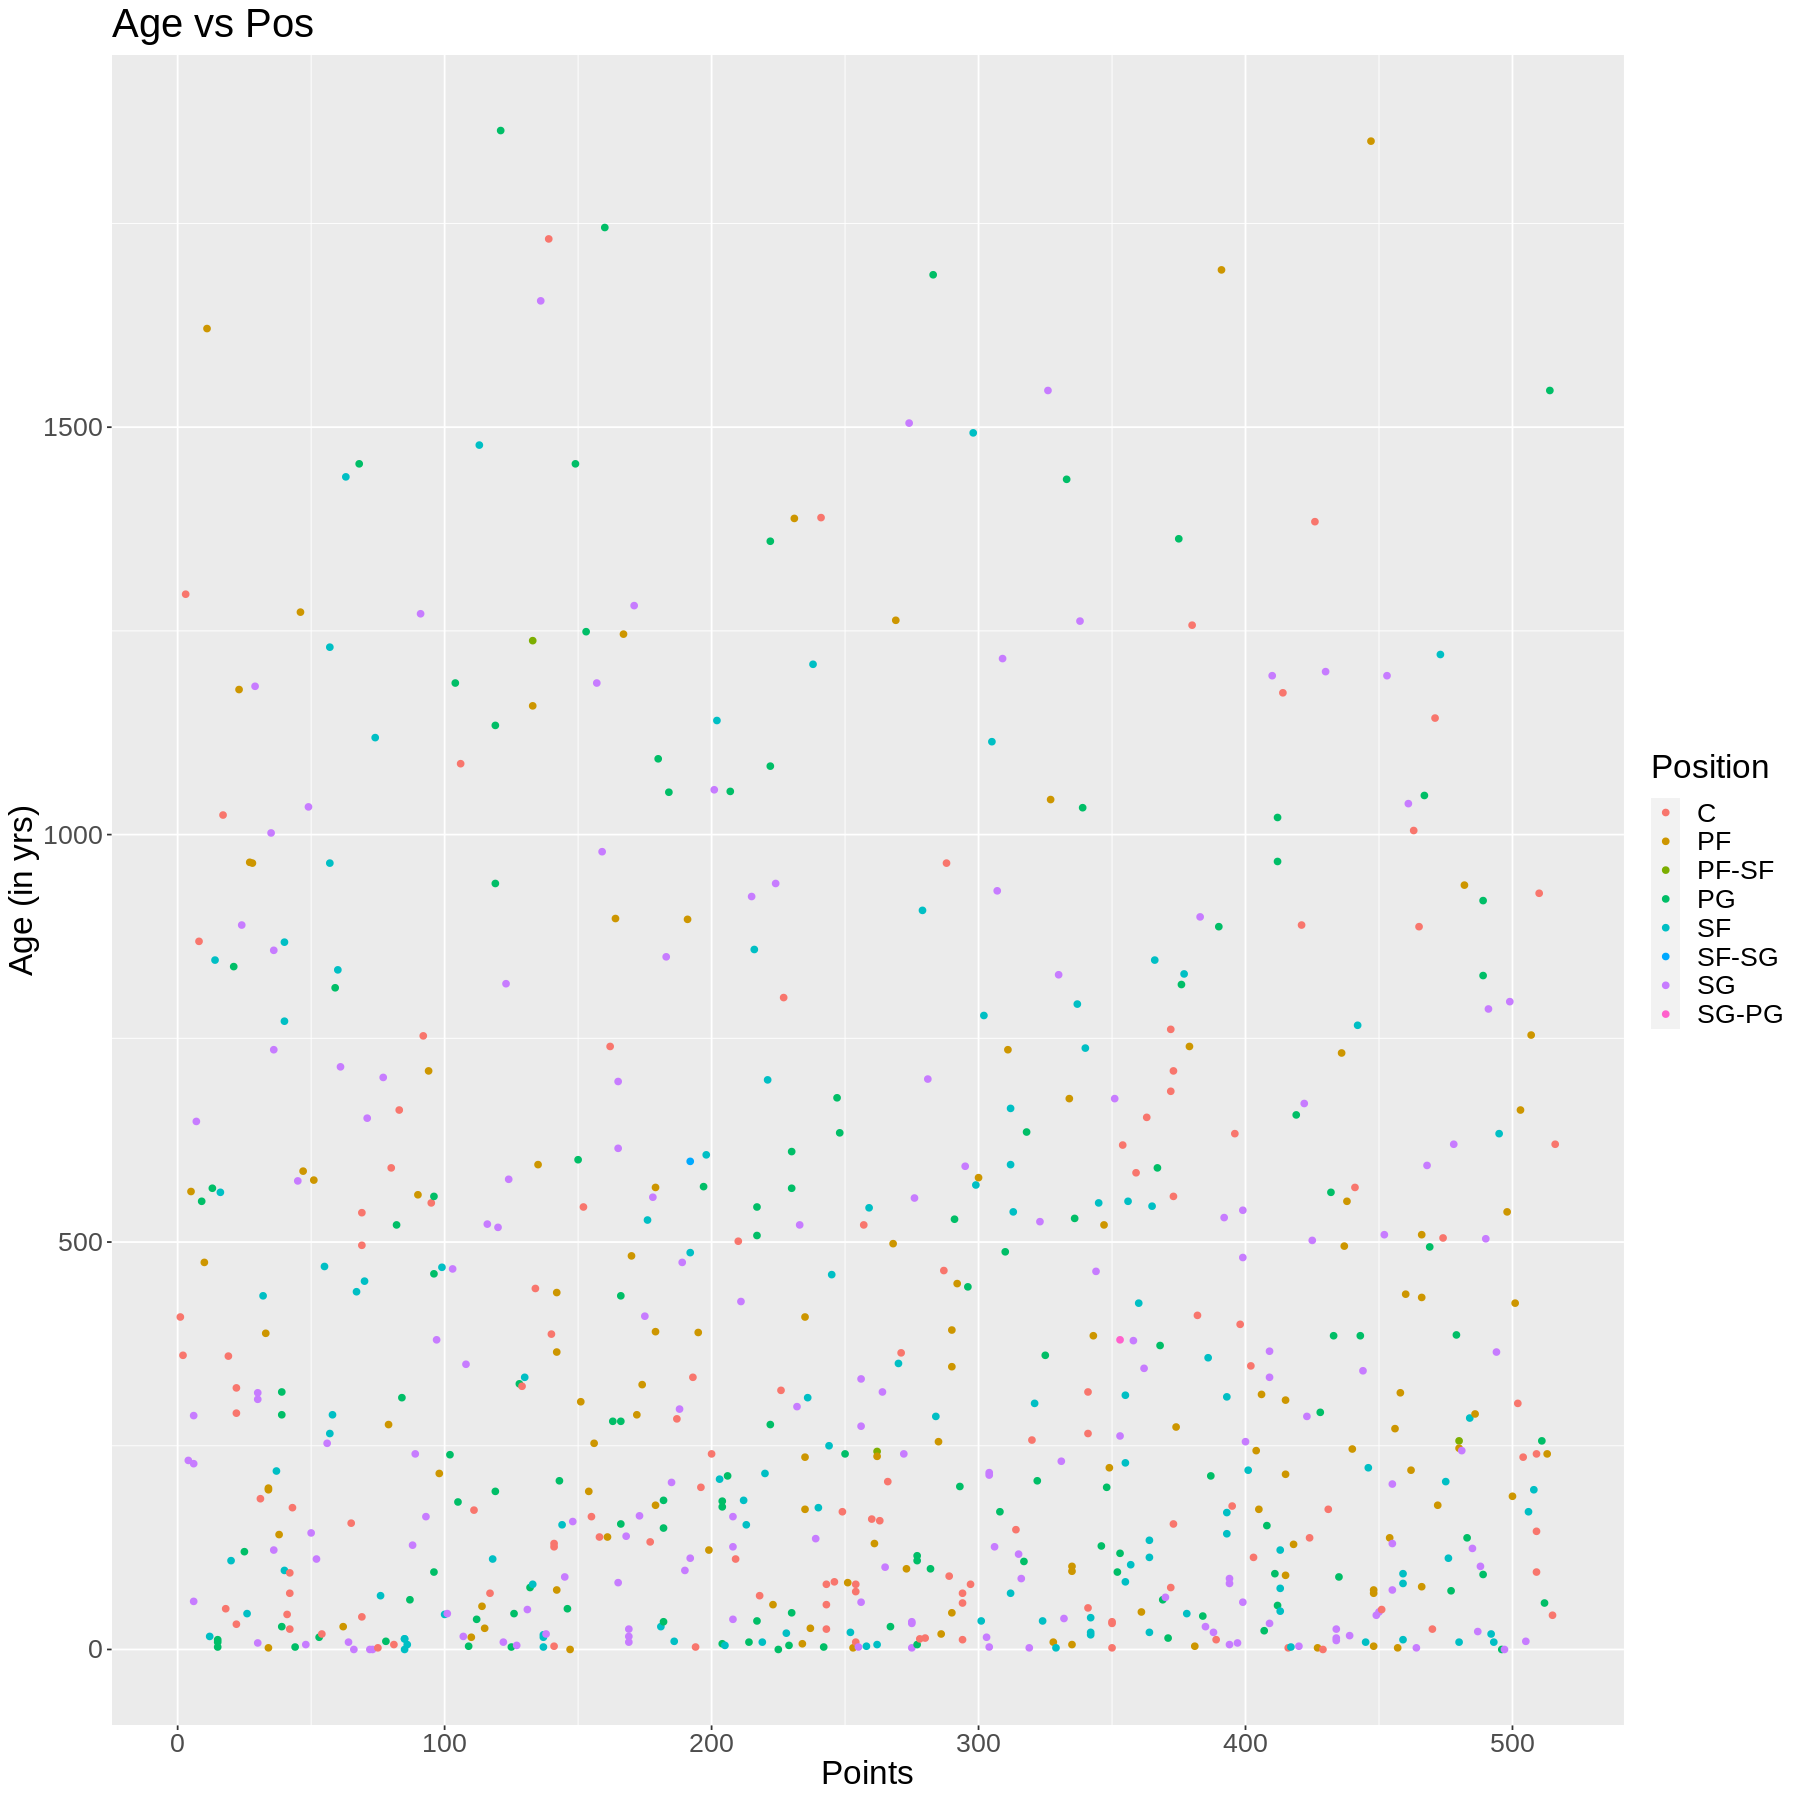

In [3]:
options(repr.plot.width = 15, repr.plot.height = 15) 

position_plot <- page |>
    ggplot(aes(x = Rk, y = PTS, color = Pos)) +
    geom_point() +
    labs(x = "Points", y = "Age (in yrs)", color = "Position", title = "Age vs Pos") +
    theme(text = element_text(size = 20))

position_plot

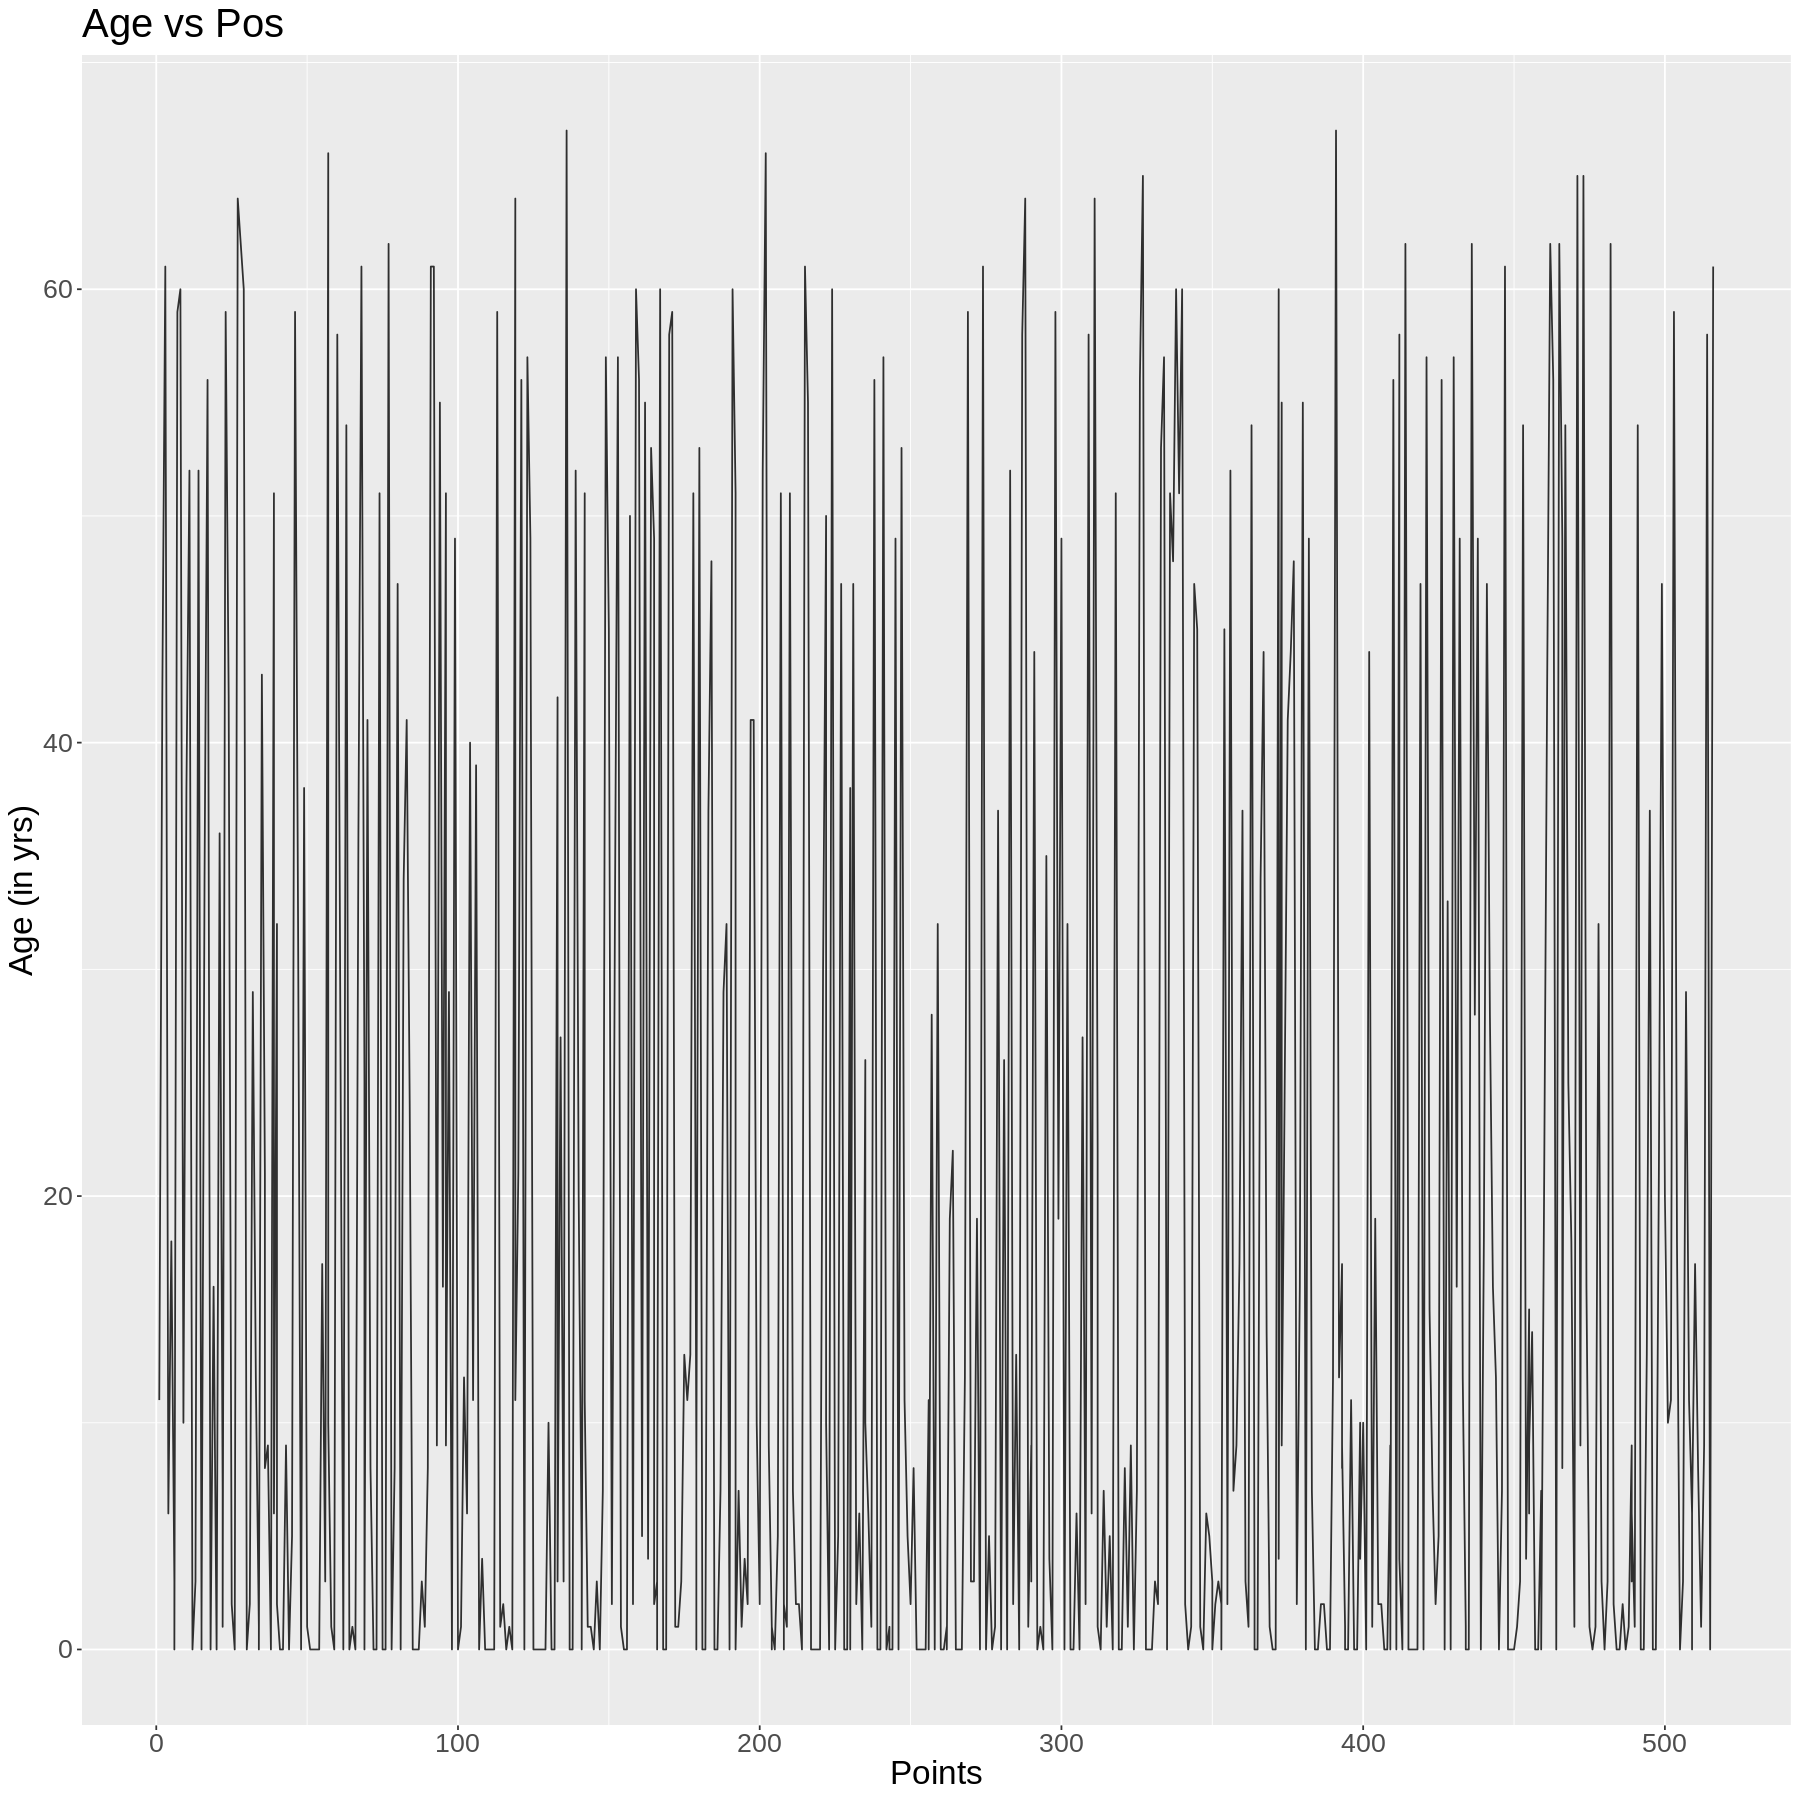

In [6]:
options(repr.plot.width = 15, repr.plot.height = 15) 

rk_plot <- page |>
    ggplot(aes(x = Rk, y = GS)) +
    geom_line(alpha = 0.8) +
    labs(x = "Points", y = "Age (in yrs)", color = "Position", title = "Age vs Pos") +
    theme(text = element_text(size = 20))

rk_plot

The command below will load and install the pacman packages if it's...

Rk, PTS, GS, FG%
<font color = "blue"> Our research will be predicting whether an NBA player will make it to the All-Star Team based on their performance statisitics in the 2023 season. Based Based on 2021-2022 years dataset, mutate a new column all star(binary, yes or no), select three variables, make the predictive model, split to train-test dataset, verify accuracy, retest on 2023 data
</font>

In [5]:
new_observation <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
        set_engine("kknn") |>
       set_mode("classification")

new_observation

new_observation_recipe <- recipe(Pos ~ Rk + GS, data = page) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

new_observation_recipe

new_observation_fit <- workflow() |>
    add_recipe(new_observation_recipe) |>
    add_model(new_observation) |>
    fit(data = page)

new_observation_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 10
  weight_func = rectangular

Computational engine: kknn 


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.7686335
Best kernel: rectangular
Best k: 10

Determine the species with the petal length of the sepal... using a multivariable 
We wish to create a model which is able to classify the different types of Iris flower.

Our research question is to ...

The scatterplot as shown above shows the relationship between sepal length and petal length which is distinguished through its species Iris.